In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit.transpiler import CouplingMap
from qiskit.compiler import transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import StatePreparation
from qiskit.visualization import plot_coupling_map
import numpy as np

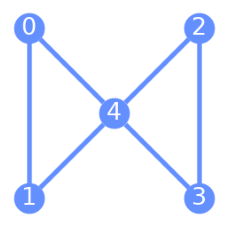

In [14]:
num_qubits = 5
qubit_coordinates = [[2, 0], [0, 0], [2, 2], [0, 2], [1, 1]]
coupling_map = [[0, 1], [2, 3], [0, 4], [2, 4], [1, 4], [3, 4]]
plot_coupling_map(num_qubits, qubit_coordinates, coupling_map)

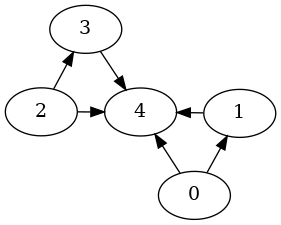

In [15]:
cmap = CouplingMap(coupling_map)
# cmap.make_symmetric()
cmap.draw()

In [16]:
# allowed gates: x, h, rz, cx
# allowed depth: less than 50

size = 5  # number of qubits
state_values = [22, 17, 27, 12]
state_vector = [0] * 2**size
for s in state_values:
    print(np.binary_repr(s, size))
    state_vector[s] = 0.5
np.asarray(state_vector)

10110
10001
11011
01100


array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5,
       0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ,
       0. , 0.5, 0. , 0. , 0. , 0. ])

In [17]:
qubits = size
qreg = QuantumRegister(qubits)
creg = ClassicalRegister(qubits)
qc = QuantumCircuit(qreg, creg)

# qc.initialize(state_vector, qreg)
qc.append(StatePreparation(state_vector), qreg)
qc = transpile(qc, basis_gates=["x", "h", "rz", "cx"], coupling_map=cmap, optimization_level=3)
print(qc.depth())

178


In [18]:
sv = Statevector(qc)
sv.draw("latex")

<IPython.core.display.Latex object>